In [34]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
import math

from lib.kf_book.gaussian_internal import plot_height_std
from lib.kf_book.book_plots import bar_plot

### Random Variable & Probability Distribution & Mean & Standard deviation & Variance

In [12]:
from numpy.random import randn
data = 1.8 + randn(100) * .1414
data

array([1.89985828, 1.81410995, 1.96184259, 1.90957615, 1.55747289,
       1.79559161, 1.8909188 , 1.43007134, 1.85629566, 1.93980585,
       1.80113034, 1.89252073, 1.81757139, 1.9459223 , 1.66208256,
       1.57293722, 1.9363221 , 1.95762751, 1.91439712, 1.93429426,
       1.75125922, 2.02029935, 1.81334127, 1.72534049, 1.7280013 ,
       1.77589365, 1.76917587, 1.75849246, 1.81015276, 1.56741921,
       1.56991684, 1.89731433, 1.78859069, 1.70779275, 1.83000192,
       1.79837677, 1.62300769, 1.84917684, 1.63500672, 1.79702835,
       1.77033675, 1.89391282, 1.85175218, 1.65959979, 1.99091221,
       1.66343775, 2.04078592, 1.6985515 , 2.1212492 , 2.08968256,
       2.02656966, 1.66608815, 1.73276938, 1.77713848, 1.6804147 ,
       2.14283849, 1.82780889, 2.00714525, 1.65138091, 1.70726641,
       1.69599669, 1.5694092 , 1.98301524, 1.80870753, 1.7464563 ,
       1.90823646, 1.79534121, 1.87499641, 1.60896742, 1.79185123,
       1.7705482 , 1.77339494, 1.94603916, 1.82471778, 1.88902

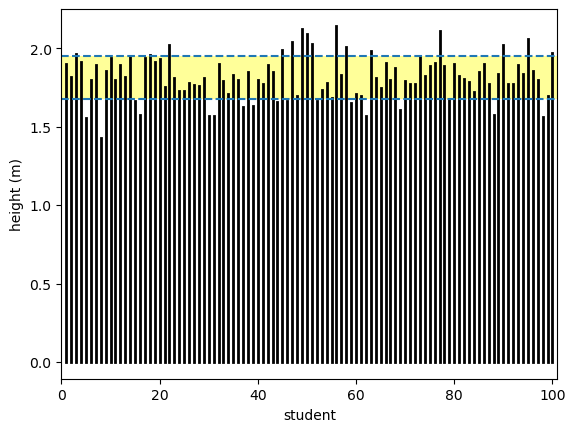

mean = 1.815
std  = 0.139


In [13]:
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

In [19]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.

68.0

### Gaussian Function & Gaussian Distribution (Normalized)

In [24]:
from filterpy.stats import gaussian

In [22]:
xs = np.arange(15, 30, 0.05)
xs

array([15.  , 15.05, 15.1 , 15.15, 15.2 , 15.25, 15.3 , 15.35, 15.4 ,
       15.45, 15.5 , 15.55, 15.6 , 15.65, 15.7 , 15.75, 15.8 , 15.85,
       15.9 , 15.95, 16.  , 16.05, 16.1 , 16.15, 16.2 , 16.25, 16.3 ,
       16.35, 16.4 , 16.45, 16.5 , 16.55, 16.6 , 16.65, 16.7 , 16.75,
       16.8 , 16.85, 16.9 , 16.95, 17.  , 17.05, 17.1 , 17.15, 17.2 ,
       17.25, 17.3 , 17.35, 17.4 , 17.45, 17.5 , 17.55, 17.6 , 17.65,
       17.7 , 17.75, 17.8 , 17.85, 17.9 , 17.95, 18.  , 18.05, 18.1 ,
       18.15, 18.2 , 18.25, 18.3 , 18.35, 18.4 , 18.45, 18.5 , 18.55,
       18.6 , 18.65, 18.7 , 18.75, 18.8 , 18.85, 18.9 , 18.95, 19.  ,
       19.05, 19.1 , 19.15, 19.2 , 19.25, 19.3 , 19.35, 19.4 , 19.45,
       19.5 , 19.55, 19.6 , 19.65, 19.7 , 19.75, 19.8 , 19.85, 19.9 ,
       19.95, 20.  , 20.05, 20.1 , 20.15, 20.2 , 20.25, 20.3 , 20.35,
       20.4 , 20.45, 20.5 , 20.55, 20.6 , 20.65, 20.7 , 20.75, 20.8 ,
       20.85, 20.9 , 20.95, 21.  , 21.05, 21.1 , 21.15, 21.2 , 21.25,
       21.3 , 21.35,

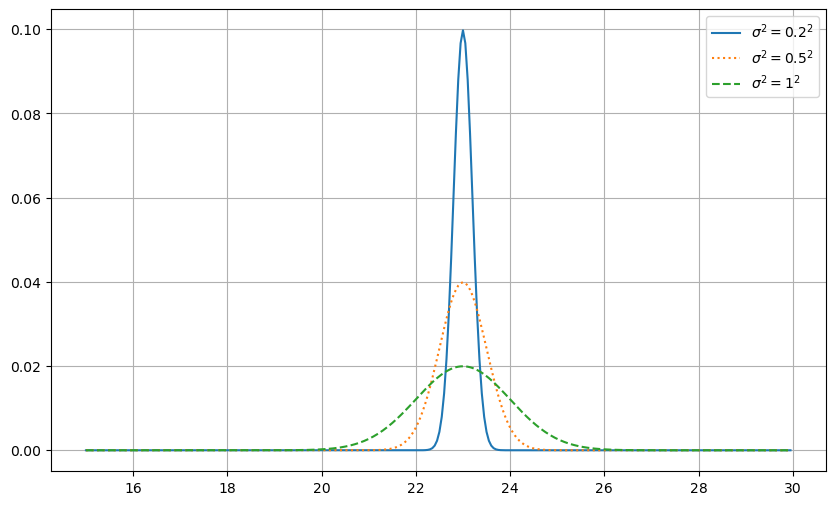

In [28]:
xs = np.arange(15, 30, 0.05)
plt.figure(figsize=(10, 6))
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.grid()
plt.legend();

In [31]:
def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

Computational Properties of Normally Distributed Random Variables

>A remarkable property of Gaussian random variables is that the sum of two independent Gaussian random variables is also normally distributed! The product is not Gaussian, but proportional to a Gaussian. There we can say that the result of multipying two Gaussian distributions is a Gaussian function

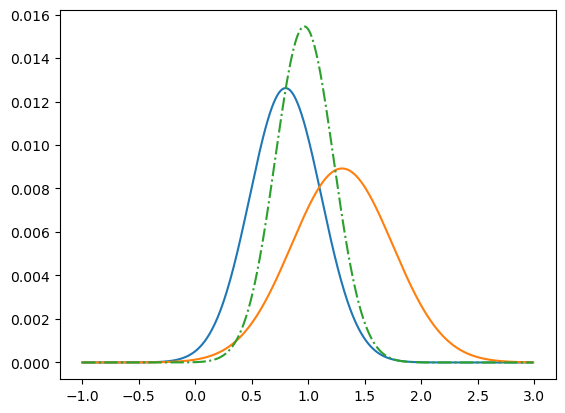

In [32]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

Still a gaussian distribution after multiplication of two gaussians

In [33]:
from filterpy.stats import norm_cdf

print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


The product of two gaussians: $ \mu = \frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1}{\sigma_1^2 + \sigma_2^2}   \sigma^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}$

### Replace discrete probability distribution with gaussians which only need two elements, $\mu$ and $\sigma^2$

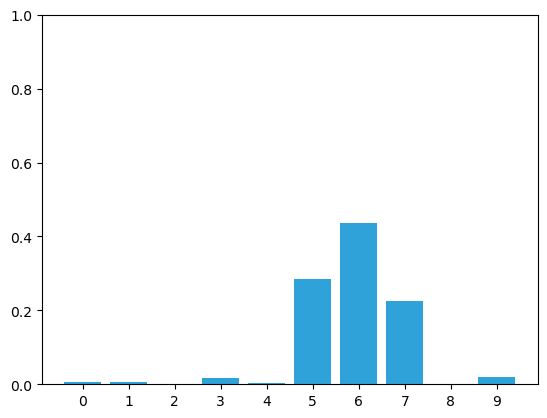

In [35]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
bar_plot(posterior)

mean: 5.88 var: 1.24


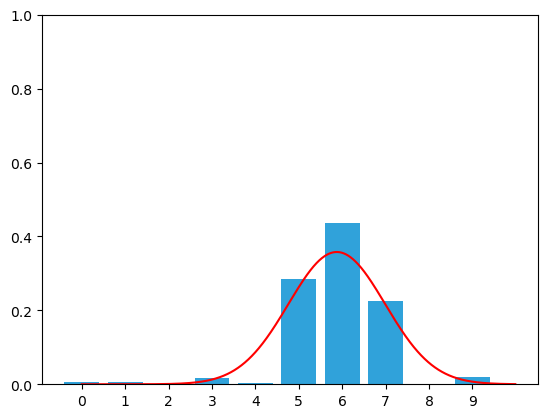

In [37]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

>If the arrays contain a million elements, that is one million multiplications. However, if we replace the arrays with a Gaussian then we would perform that calculation with : $ \mu = \frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1}{\sigma_1^2 + \sigma_2^2}   \sigma^2 = \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}$